# 1: Imports & Setup

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', 100)  # Show more columns if needed

print("✅ Imports done.")


✅ Imports done.


# 2: Load the Data

In [2]:
# Load training targets
targets = pd.read_excel("/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAINING_SOLUTIONS.xlsx")

# Load functional brain connectome features
connectome = pd.read_csv("/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_FUNCTIONAL_CONNECTOME_MATRICES_new_36P_Pearson.csv")

# Load categorical metadata
cat_meta = pd.read_excel("/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_CATEGORICAL_METADATA_new.xlsx")

# Load quantitative metadata
quant_meta = pd.read_excel("/kaggle/input/widsdatathon2025/TRAIN_NEW/TRAIN_QUANTITATIVE_METADATA_new.xlsx")


In [3]:
# Merge into one DataFrame called 'wd'
wd = targets.copy()
wd = wd.merge(connectome, on='participant_id', how='left')
wd = wd.merge(cat_meta, on='participant_id', how='left')
wd = wd.merge(quant_meta, on='participant_id', how='left')

# Quick shape check
print("✅ Shape of merged training data:", wd.shape)
wd.head()


✅ Shape of merged training data: (1213, 19930)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,participant_id,ADHD_Outcome,Sex_F,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,0throw_11thcolumn,0throw_12thcolumn,0throw_13thcolumn,0throw_14thcolumn,0throw_15thcolumn,0throw_16thcolumn,0throw_17thcolumn,0throw_18thcolumn,0throw_19thcolumn,0throw_20thcolumn,0throw_21thcolumn,0throw_22thcolumn,0throw_23thcolumn,0throw_24thcolumn,0throw_25thcolumn,0throw_26thcolumn,0throw_27thcolumn,0throw_28thcolumn,0throw_29thcolumn,0throw_30thcolumn,0throw_31thcolumn,0throw_32thcolumn,0throw_33thcolumn,0throw_34thcolumn,0throw_35thcolumn,0throw_36thcolumn,0throw_37thcolumn,0throw_38thcolumn,0throw_39thcolumn,0throw_40thcolumn,0throw_41thcolumn,0throw_42thcolumn,0throw_43thcolumn,0throw_44thcolumn,0throw_45thcolumn,0throw_46thcolumn,0throw_47thcolumn,...,192throw_198thcolumn,192throw_199thcolumn,193throw_194thcolumn,193throw_195thcolumn,193throw_196thcolumn,193throw_197thcolumn,193throw_198thcolumn,193throw_199thcolumn,194throw_195thcolumn,194throw_196thcolumn,194throw_197thcolumn,194throw_198thcolumn,194throw_199thcolumn,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,1,1,0.131179,0.624215,0.277402,0.298592,0.759000,0.662423,0.571035,0.467716,0.524176,0.431877,0.520218,-0.111022,-0.131423,-0.019404,-0.087645,-0.141685,-0.011132,0.011524,0.053835,-0.068349,0.092325,0.162111,0.110339,0.050189,0.186407,0.117441,0.029032,0.446372,0.540902,0.326058,0.482136,0.482744,0.300210,0.102812,0.227850,0.295776,0.351981,-0.002465,0.163335,-0.084952,0.016213,-0.025439,0.078814,-0.229631,-0.242848,-0.112944,-0.389435,...,0.354238,0.252398,0.396294,0.273284,0.095622,0.062186,0.110866,0.066288,0.746586,0.040584,-0.157698,-0.097332,0.221569,0.073282,-0.044925,-0.057102,0.260735,0.458798,0.201057,0.207405,0.606301,0.586939,0.460227,2016,1,0.0,0.0,1.0,21.0,45.0,21.0,45.0,40.00,13.0,3.0,10.0,47.0,13.0,11.0,28.0,0.0,6.0,1.0,5.0,0.0,5.0,1.0,0.0,10.0,NaN
1,CPaeQkhcjg7d,1,0,0.566404,0.373010,0.620062,0.226501,0.388081,0.298320,0.162486,-0.113101,-0.104712,-0.218897,-0.124157,-0.076453,-0.280378,-0.272335,-0.297827,-0.329922,-0.311892,0.160154,-0.182421,-0.011465,-0.175892,-0.077345,-0.174914,-0.383742,-0.339158,-0.212239,-0.197538,0.466234,0.251399,0.023384,0.461355,0.265471,0.015526,-0.241855,-0.146587,-0.410712,-0.088327,-0.264618,-0.124120,-0.001024,-0.096380,0.043276,-0.142665,0.004261,-0.195353,0.299896,0.173379,...,-0.138208,-0.266746,0.135432,0.075570,-0.205510,0.168887,0.205291,0.328191,0.401676,0.035492,0.091486,0.124476,0.111276,0.138573,0.110515,-0.132631,-0.023360,0.572922,0.572254,0.436960,0.570057,0.565683,0.718430,2019,3,1.0,2.0,3.0,15.0,15.0,NaN,NaN,-94.47,14.0,3.0,13.0,34.0,18.0,23.0,30.0,0.0,18.0,6.0,8.0,7.0,8.0,10.0,4.0,5.0,NaN
2,Nb4EetVPm3gs,1,0,0.549076,0.654565,0.568332,0.275605,0.309836,0.299008,0.313129,-0.003321,0.189899,-0.071062,0.143982,-0.091953,0.009807,-0.012467,0.012967,-0.126908,-0.083618,-0.108008,-0.067233,0.167389,0.099339,-0.031546,0.248409,-0.054004,0.114214,0.069751,0.027255,0.287550,0.428203,0.040075,0.272582,0.093797,0.001675,-0.069901,0.001889,-0.156405,-0.218839,-0.181800,-0.062380,-0.005695,0.187718,-0.034566,-0.287475,0.165256,0.105787,-0.421214,-0.3750

# 3: Data Overview

3.1: Basic Info & Structure

In [4]:
# Check shape and column list
print("Shape:", wd.shape)


Shape: (1213, 19930)


3.2: Peek at the Data

In [5]:
# Display the first few rows
wd.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,participant_id,ADHD_Outcome,Sex_F,0throw_1thcolumn,0throw_2thcolumn,0throw_3thcolumn,0throw_4thcolumn,0throw_5thcolumn,0throw_6thcolumn,0throw_7thcolumn,0throw_8thcolumn,0throw_9thcolumn,0throw_10thcolumn,0throw_11thcolumn,0throw_12thcolumn,0throw_13thcolumn,0throw_14thcolumn,0throw_15thcolumn,0throw_16thcolumn,0throw_17thcolumn,0throw_18thcolumn,0throw_19thcolumn,0throw_20thcolumn,0throw_21thcolumn,0throw_22thcolumn,0throw_23thcolumn,0throw_24thcolumn,0throw_25thcolumn,0throw_26thcolumn,0throw_27thcolumn,0throw_28thcolumn,0throw_29thcolumn,0throw_30thcolumn,0throw_31thcolumn,0throw_32thcolumn,0throw_33thcolumn,0throw_34thcolumn,0throw_35thcolumn,0throw_36thcolumn,0throw_37thcolumn,0throw_38thcolumn,0throw_39thcolumn,0throw_40thcolumn,0throw_41thcolumn,0throw_42thcolumn,0throw_43thcolumn,0throw_44thcolumn,0throw_45thcolumn,0throw_46thcolumn,0throw_47thcolumn,...,192throw_198thcolumn,192throw_199thcolumn,193throw_194thcolumn,193throw_195thcolumn,193throw_196thcolumn,193throw_197thcolumn,193throw_198thcolumn,193throw_199thcolumn,194throw_195thcolumn,194throw_196thcolumn,194throw_197thcolumn,194throw_198thcolumn,194throw_199thcolumn,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,Basic_Demos_Enroll_Year,Basic_Demos_Study_Site,PreInt_Demos_Fam_Child_Ethnicity,PreInt_Demos_Fam_Child_Race,MRI_Track_Scan_Location,Barratt_Barratt_P1_Edu,Barratt_Barratt_P1_Occ,Barratt_Barratt_P2_Edu,Barratt_Barratt_P2_Occ,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,SDQ_SDQ_Difficulties_Total,SDQ_SDQ_Emotional_Problems,SDQ_SDQ_Externalizing,SDQ_SDQ_Generating_Impact,SDQ_SDQ_Hyperactivity,SDQ_SDQ_Internalizing,SDQ_SDQ_Peer_Problems,SDQ_SDQ_Prosocial,MRI_Track_Age_at_Scan
0,UmrK0vMLopoR,1,1,0.131179,0.624215,0.277402,0.298592,0.759000,0.662423,0.571035,0.467716,0.524176,0.431877,0.520218,-0.111022,-0.131423,-0.019404,-0.087645,-0.141685,-0.011132,0.011524,0.053835,-0.068349,0.092325,0.162111,0.110339,0.050189,0.186407,0.117441,0.029032,0.446372,0.540902,0.326058,0.482136,0.482744,0.300210,0.102812,0.227850,0.295776,0.351981,-0.002465,0.163335,-0.084952,0.016213,-0.025439,0.078814,-0.229631,-0.242848,-0.112944,-0.389435,...,0.354238,0.252398,0.396294,0.273284,0.095622,0.062186,0.110866,0.066288,0.746586,0.040584,-0.157698,-0.097332,0.221569,0.073282,-0.044925,-0.057102,0.260735,0.458798,0.201057,0.207405,0.606301,0.586939,0.460227,2016,1,0.0,0.0,1.0,21.0,45.0,21.0,45.0,40.00,13.0,3.0,10.0,47.0,13.0,11.0,28.0,0.0,6.0,1.0,5.0,0.0,5.0,1.0,0.0,10.0,NaN
1,CPaeQkhcjg7d,1,0,0.566404,0.373010,0.620062,0.226501,0.388081,0.298320,0.162486,-0.113101,-0.104712,-0.218897,-0.124157,-0.076453,-0.280378,-0.272335,-0.297827,-0.329922,-0.311892,0.160154,-0.182421,-0.011465,-0.175892,-0.077345,-0.174914,-0.383742,-0.339158,-0.212239,-0.197538,0.466234,0.251399,0.023384,0.461355,0.265471,0.015526,-0.241855,-0.146587,-0.410712,-0.088327,-0.264618,-0.124120,-0.001024,-0.096380,0.043276,-0.142665,0.004261,-0.195353,0.299896,0.173379,...,-0.138208,-0.266746,0.135432,0.075570,-0.205510,0.168887,0.205291,0.328191,0.401676,0.035492,0.091486,0.124476,0.111276,0.138573,0.110515,-0.132631,-0.023360,0.572922,0.572254,0.436960,0.570057,0.565683,0.718430,2019,3,1.0,2.0,3.0,15.0,15.0,NaN,NaN,-94.47,14.0,3.0,13.0,34.0,18.0,23.0,30.0,0.0,18.0,6.0,8.0,7.0,8.0,10.0,4.0,5.0,NaN
2,Nb4EetVPm3gs,1,0,0.549076,0.654565,0.568332,0.275605,0.309836,0.299008,0.313129,-0.003321,0.189899,-0.071062,0.143982,-0.091953,0.009807,-0.012467,0.012967,-0.126908,-0.083618,-0.108008,-0.067233,0.167389,0.099339,-0.031546,0.248409,-0.054004,0.114214,0.069751,0.027255,0.287550,0.428203,0.040075,0.272582,0.093797,0.001675,-0.069901,0.001889,-0.156405,-0.218839,-0.181800,-0.062380,-0.005695,0.187718,-0.034566,-0.287475,0.165256,0.105787,-0.421214,-0.3750

3.3: Info Summary

In [6]:
# Check data types and non-null counts
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Columns: 19930 entries, participant_id to MRI_Track_Age_at_Scan
dtypes: float64(19925), int64(4), object(1)
memory usage: 184.4+ MB


3.4: Missing Value Check

In [7]:
# Count missing values
missing = wd.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

MRI_Track_Age_at_Scan               360
Barratt_Barratt_P2_Occ              222
Barratt_Barratt_P2_Edu              198
PreInt_Demos_Fam_Child_Race          54
PreInt_Demos_Fam_Child_Ethnicity     43
Barratt_Barratt_P1_Occ               31
ColorVision_CV_Score                 23
Barratt_Barratt_P1_Edu               15
EHQ_EHQ_Total                        13
APQ_P_APQ_P_PM                       12
APQ_P_APQ_P_PP                       12
APQ_P_APQ_P_OPD                      12
APQ_P_APQ_P_INV                      12
APQ_P_APQ_P_ID                       12
APQ_P_APQ_P_CP                       12
SDQ_SDQ_Difficulties_Total            9
SDQ_SDQ_Emotional_Problems            9
SDQ_SDQ_Externalizing                 9
SDQ_SDQ_Generating_Impact             9
SDQ_SDQ_Hyperactivity                 9
SDQ_SDQ_Internalizing                 9
SDQ_SDQ_Peer_Problems                 9
SDQ_SDQ_Prosocial                     9
SDQ_SDQ_Conduct_Problems              9
MRI_Track_Scan_Location               3


# 4: Exploratory Data Analysis (EDA)

4.1: Plot ADHD Diagnosis Distribution

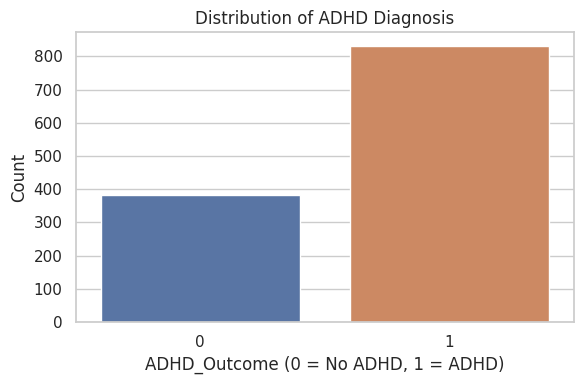

In [8]:
# 📦 Imports (in case not already imported)
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Plotting ADHD Outcome
plt.figure(figsize=(6, 4))
sns.countplot(data=wd, x='ADHD_Outcome')
plt.title('Distribution of ADHD Diagnosis')
plt.xlabel('ADHD_Outcome (0 = No ADHD, 1 = ADHD)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4.2: Plot Sex Distribution

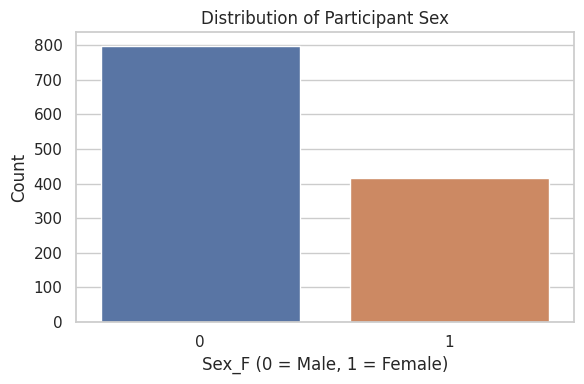

In [9]:
# ⚥ Plotting Sex Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=wd, x='Sex_F')
plt.title('Distribution of Participant Sex')
plt.xlabel('Sex_F (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


4.3: ADHD Diagnosis by Sex (Crosstab)

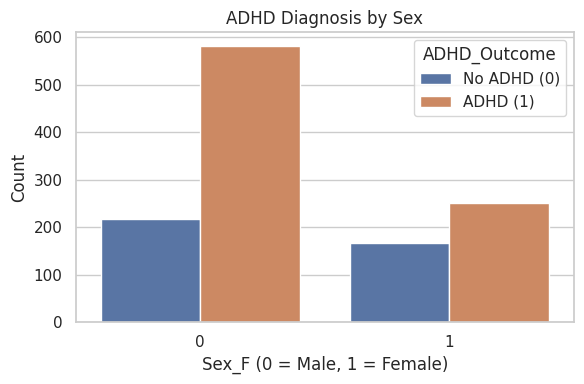

In [10]:
# 🧩 ADHD by Sex
plt.figure(figsize=(6, 4))
sns.countplot(data=wd, x='Sex_F', hue='ADHD_Outcome')
plt.title('ADHD Diagnosis by Sex')
plt.xlabel('Sex_F (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.legend(title='ADHD_Outcome', labels=['No ADHD (0)', 'ADHD (1)'])
plt.tight_layout()
plt.show()


 4.4: Age Distribution by ADHD Diagnosis

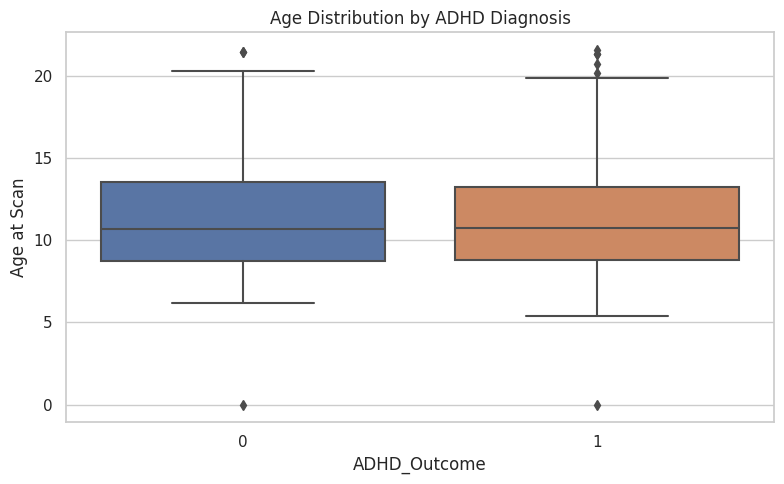

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=wd, x='ADHD_Outcome', y='MRI_Track_Age_at_Scan')
plt.title('Age Distribution by ADHD Diagnosis')
plt.xlabel('ADHD_Outcome')
plt.ylabel('Age at Scan')
plt.tight_layout()
plt.show()


4.5: Correlation Heatmap (Numeric Metadata Only)

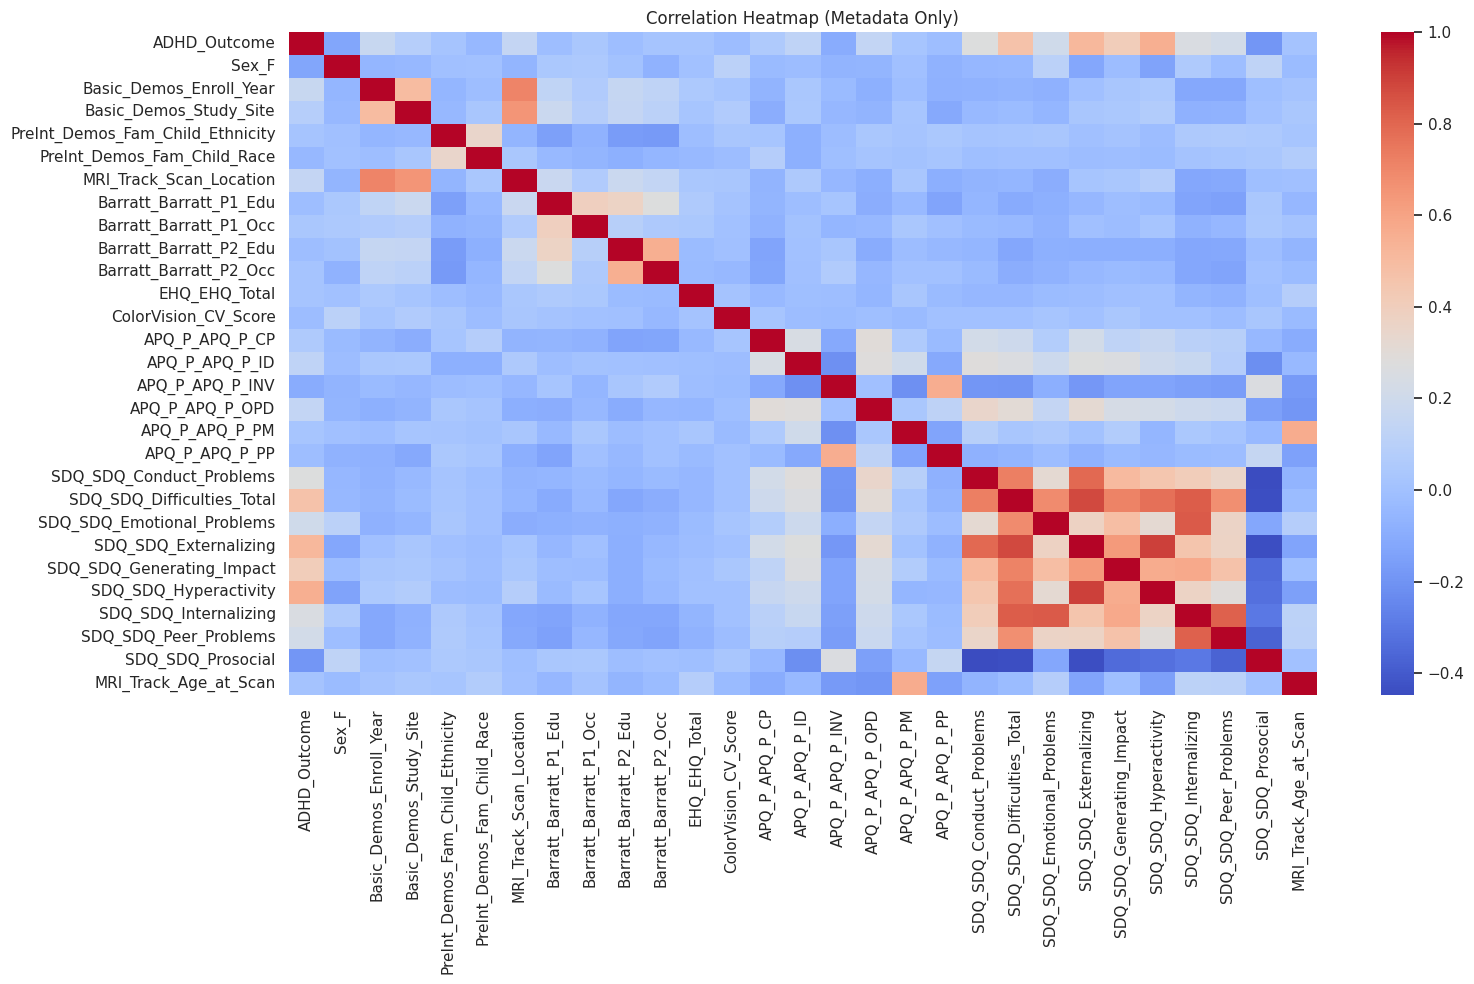

In [12]:
# Filter numeric metadata columns with relatively low dimensions
meta_numeric = wd.select_dtypes(include=['float64', 'int64']).copy()

# Drop fMRI features (those with names like '0throw_1thcolumn') to reduce clutter
meta_numeric = meta_numeric.loc[:, ~meta_numeric.columns.str.contains('throw')]

# Drop participant_id
meta_numeric = meta_numeric.drop(columns=['participant_id'], errors='ignore')

# Plot correlation
plt.figure(figsize=(16, 10))
sns.heatmap(meta_numeric.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap (Metadata Only)')
plt.tight_layout()
plt.show()


 4.6: Missing Values Heatmap (Optional)

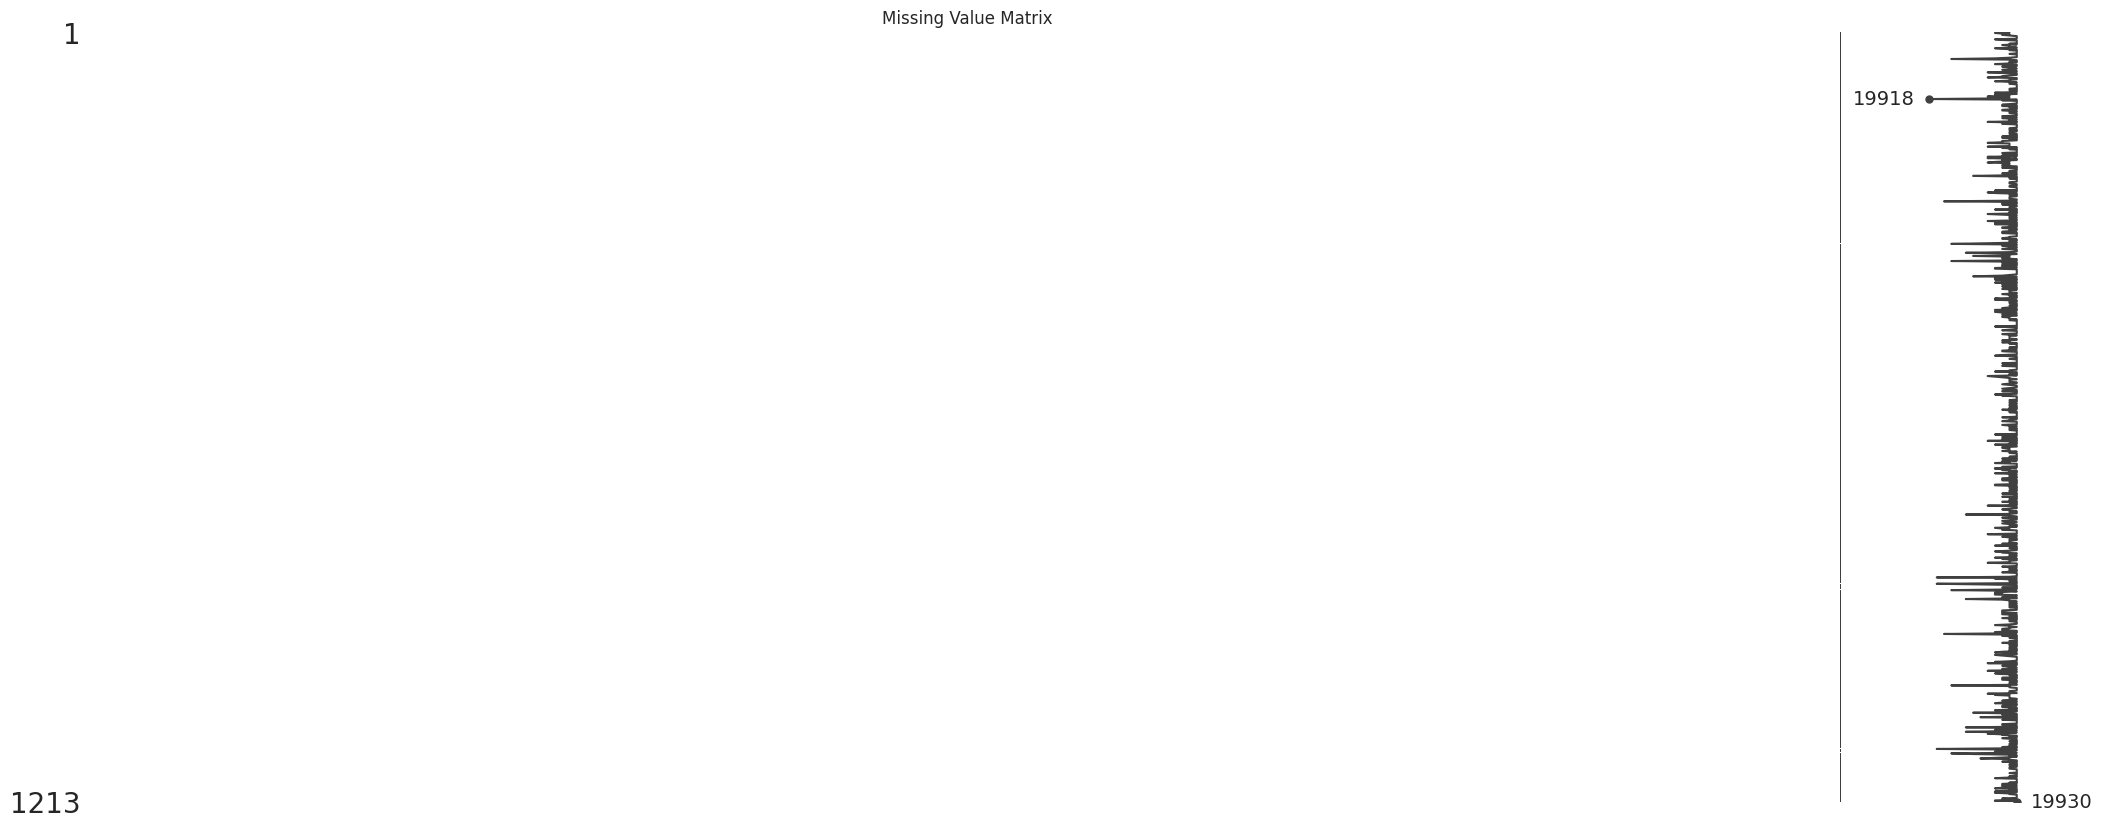

In [13]:
import missingno as msno

# Show where missing values are
msno.matrix(wd)
plt.title('Missing Value Matrix')
plt.show()


# 5: Data Preprocessing, Cleaning & Feature Engineering

5.1: Identify Categorical Metadata Columns

In [14]:
# Manually selected categorical columns (based on previous exploration)
manual_cat_cols = [
    'PreInt_Demos_Fam_Child_Race',
    'PreInt_Demos_Fam_Child_Ethnicity',
    'Barratt_Barratt_P1_Edu',
    'Barratt_Barratt_P2_Edu',
    'Barratt_Barratt_P1_Occ',
    'Barratt_Barratt_P2_Occ',
    'MRI_Track_Scan_Location'
]


5.2: One-Hot Encode These Categorical Columns

In [15]:
# One-hot encode selected columns
wd_encoded = pd.get_dummies(wd, columns=manual_cat_cols, drop_first=True)
print("✅ One-hot encoding complete. New shape:", wd_encoded.shape)


✅ One-hot encoding complete. New shape: (1213, 19968)


5.3: Select and Scale Numerical Metadata Features

In [16]:
# Manually selected numerical metadata columns
manual_numeric_cols = [
    'MRI_Track_Age_at_Scan',
    'ColorVision_CV_Score',
    'EHQ_EHQ_Total',
    'APQ_P_APQ_P_PM',
    'APQ_P_APQ_P_PP',
    'APQ_P_APQ_P_OPD',
    'APQ_P_APQ_P_INV',
    'APQ_P_APQ_P_ID',
    'APQ_P_APQ_P_CP',
    'SDQ_SDQ_Difficulties_Total',
    'SDQ_SDQ_Emotional_Problems',
    'SDQ_SDQ_Externalizing',
    'SDQ_SDQ_Generating_Impact',
    'SDQ_SDQ_Hyperactivity',
    'SDQ_SDQ_Internalizing',
    'SDQ_SDQ_Peer_Problems',
    'SDQ_SDQ_Prosocial',
    'SDQ_SDQ_Conduct_Problems'
]


In [17]:
from sklearn.preprocessing import StandardScaler

# Create a copy to preserve original
wd_scaled = wd_encoded.copy()

# Apply standard scaling
scaler = StandardScaler()
wd_scaled[manual_numeric_cols] = scaler.fit_transform(wd_scaled[manual_numeric_cols])

print("✅ Numerical metadata scaling complete.")


✅ Numerical metadata scaling complete.


5.4: Fix Missing Values

In [18]:
# We'll work with the scaled DataFrame
X_final = wd_scaled.copy()

# Fill all NaNs with column-wise means
X_final = X_final.fillna(X_final.mean(numeric_only=True))

print("✅ Missing values filled with column means.")


✅ Missing values filled with column means.


# 6: Dimensionality Reduction – PCA on fMRI Features

6.1: Select fMRI Feature Columns

In [19]:
# Identify metadata/target columns
meta_target_cols = [
    'participant_id', 'ADHD_Outcome', 'Sex_F'
] + manual_numeric_cols + list(wd_encoded.columns.difference(wd.columns))  # One-hot encoded cols

# fMRI = all columns not in meta_target_cols
fmri_cols = [col for col in wd_encoded.columns if col not in meta_target_cols]

# Extract fMRI features
fmri_data = wd_encoded[fmri_cols]

print("fMRI data shape:", fmri_data.shape)


fMRI data shape: (1213, 19902)


6.2: Apply PCA

✅ Reduced fMRI shape: (1213, 902)


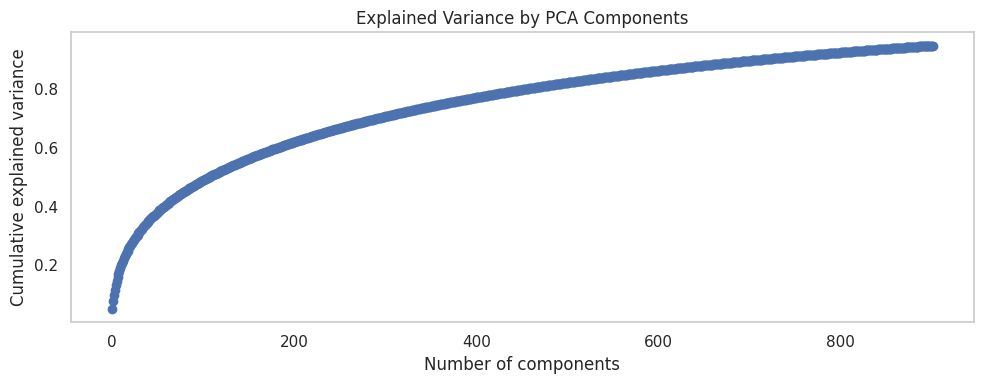

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# PCA: retain 95% of variance
pca = PCA(n_components=0.95, random_state=42)
fmri_pca = pca.fit_transform(fmri_data)

# Show result
print("✅ Reduced fMRI shape:", fmri_pca.shape)

# Plot explained variance
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.tight_layout()
plt.show()


# 7: Prepare Final Dataset & Train Baseline Model

7.1: Combine PCA Components with Metadata

In [21]:
# Convert PCA output into DataFrame with clear names
pca_df = pd.DataFrame(fmri_pca, columns=[f'pca_{i+1}' for i in range(fmri_pca.shape[1])])
pca_df.index = wd_encoded.index  # align index

# Select encoded metadata columns
metadata_cols = [col for col in wd_scaled.columns 
                 if col not in ['participant_id', 'ADHD_Outcome', 'Sex_F'] + fmri_cols]

meta_data = wd_scaled[metadata_cols]

# Combine metadata and PCA components
X_final = pd.concat([meta_data.reset_index(drop=True), pca_df.reset_index(drop=True)], axis=1)
y_final = wd_scaled[['ADHD_Outcome', 'Sex_F']]

print("✅ Final shape for training:", X_final.shape)

# This step to handle missing values
X_final = X_final.fillna(X_final.mean())
print("✅ All missing values handled in X_final.")


✅ Final shape for training: (1213, 965)
✅ All missing values handled in X_final.


7.2: Train-Test Split

In [22]:
from sklearn.model_selection import train_test_split

# Stratify by ADHD outcome to preserve class balance
X_train, X_val, y_train, y_val = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final['ADHD_Outcome']
)

print("✅ Train shape:", X_train.shape)
print("✅ Validation shape:", X_val.shape)


✅ Train shape: (970, 965)
✅ Validation shape: (243, 965)


7.3: HistGradientBoostingClassifier

In [23]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score

# New model
hgb_model = HistGradientBoostingClassifier(random_state=42)

# Wrap it for multi-output
multi_model = MultiOutputClassifier(hgb_model)

# Train
multi_model.fit(X_train, y_train)

# Predict
y_pred = multi_model.predict(X_val)

/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


7.4: Evaluate with F1 Scores

In [24]:
# Evaluate
adhd_f1 = f1_score(y_val['ADHD_Outcome'], y_pred[:, 0])
sex_f1 = f1_score(y_val['Sex_F'], y_pred[:, 1])
avg_f1 = (adhd_f1 + sex_f1) / 2

print(f"📊 ADHD F1 Score: {adhd_f1:.4f}")
print(f"📊 Sex F1 Score:  {sex_f1:.4f}")
print(f"🏁 Final Avg F1 Score: {avg_f1:.4f}")


📊 ADHD F1 Score: 0.8636
📊 Sex F1 Score:  0.1600
🏁 Final Avg F1 Score: 0.5118


# 8: Hyperparameter Tuning

8.1: Baseline Model 

In [25]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier

# Base HistGBM Model (same as before)
base_hist = HistGradientBoostingClassifier(random_state=42)

multi_hist = MultiOutputClassifier(base_hist)
multi_hist.fit(X_train, y_train)

# Predict and Evaluate
y_pred_hist = multi_hist.predict(X_val)

f1_adhd_hist = f1_score(y_val['ADHD_Outcome'], y_pred_hist[:, 0])
f1_sex_hist = f1_score(y_val['Sex_F'], y_pred_hist[:, 1])

print(f"📊 ADHD F1: {f1_adhd_hist:.4f}, Sex F1: {f1_sex_hist:.4f}, Avg: {(f1_adhd_hist + f1_sex_hist)/2:.4f}")


📊 ADHD F1: 0.8636, Sex F1: 0.1600, Avg: 0.5118


8.2: Tune Learning Rate + Estimators

In [26]:
from sklearn.model_selection import GridSearchCV

# Grid Search
param_grid = {
    'estimator__learning_rate': [0.1, 0.05, 0.01],
    'estimator__max_iter': [100, 300, 500]
}

grid_search = GridSearchCV(
    MultiOutputClassifier(HistGradientBoostingClassifier(random_state=42)),
    param_grid,
    scoring='f1_micro',
    cv=3,
    verbose=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("✅ Best params:", grid_search.best_params_)
print("✅ Best Score:", grid_search.best_score_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
✅ Best params: {'estimator__learning_rate': 0.1, 'estimator__max_iter': 300}
✅ Best Score: 0.7059975111902688


8.3: Fix learning_rate + n_estimators → Tune max_depth and min_samples_leaf

In [27]:
param_grid2 = {
    'estimator__max_depth': [3, 5, 7, 10],
    'estimator__min_samples_leaf': [10, 20, 30]
}

grid_search2 = GridSearchCV(
    MultiOutputClassifier(
        HistGradientBoostingClassifier(
            random_state=42,
            learning_rate=grid_search.best_params_['estimator__learning_rate'],
            max_iter=grid_search.best_params_['estimator__max_iter']
        )
    ),
    param_grid2,
    scoring='f1_micro',
    cv=3,
    verbose=3,
    n_jobs=-1
)

grid_search2.fit(X_train, y_train)

print("✅ Best params:", grid_search2.best_params_)
print("✅ Best Score:", grid_search2.best_score_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
✅ Best params: {'estimator__max_depth': 5, 'estimator__min_samples_leaf': 30}
✅ Best Score: 0.7174090800159002


8.6: Final Regularisation (subsample, max_leaf_nodes)

In [28]:
param_grid3 = {
    'estimator__max_leaf_nodes': [20, 31, 50],
    'estimator__l2_regularization': [0.0, 1.0, 5.0],  # <-- added useful parameter
    'estimator__min_samples_leaf': [10, 20, 30]        # <-- optional if you want more tuning
}

grid_search3 = GridSearchCV(
    MultiOutputClassifier(
        HistGradientBoostingClassifier(
            random_state=42,
            learning_rate=grid_search.best_params_['estimator__learning_rate'],
            max_iter=grid_search.best_params_['estimator__max_iter'],
            max_depth=grid_search2.best_params_['estimator__max_depth'],
            min_samples_leaf=grid_search2.best_params_['estimator__min_samples_leaf']
        )
    ),
    param_grid=param_grid3,
    scoring='f1_micro',
    cv=3,
    verbose=3,
    n_jobs=-1
)

grid_search3.fit(X_train, y_train)

print("✅ Best params:", grid_search3.best_params_)
print("✅ Best Score:", grid_search3.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
✅ Best params: {'estimator__l2_regularization': 0.0, 'estimator__max_leaf_nodes': 20, 'estimator__min_samples_leaf': 30}
✅ Best Score: 0.7174090800159002


# 9: Final Model Training & Submission

9.1: Retrain on tuned parameters

In [29]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

final_model = MultiOutputClassifier(
    HistGradientBoostingClassifier(
        random_state=42,
        learning_rate=grid_search.best_params_['estimator__learning_rate'],
        max_iter=grid_search.best_params_['estimator__max_iter'],
        max_depth=grid_search2.best_params_['estimator__max_depth'],
        min_samples_leaf=grid_search3.best_params_['estimator__min_samples_leaf'],
        max_leaf_nodes=grid_search3.best_params_['estimator__max_leaf_nodes'],
        l2_regularization=grid_search3.best_params_['estimator__l2_regularization']
    )
)

# Train on full training data
final_model.fit(X_train, y_train)

print("✅ Final model retrained!")


✅ Final model retrained!


9.2: Full test pipeline

In [30]:
# 1. Load the test files
test_connectome = pd.read_csv("/kaggle/input/widsdatathon2025/TEST/TEST_FUNCTIONAL_CONNECTOME_MATRICES.csv")
test_cat_meta = pd.read_excel("/kaggle/input/widsdatathon2025/TEST/TEST_CATEGORICAL.xlsx")
test_quant_meta = pd.read_excel("/kaggle/input/widsdatathon2025/TEST/TEST_QUANTITATIVE_METADATA.xlsx")
test_ids = pd.read_excel("/kaggle/input/widsdatathon2025/SAMPLE_SUBMISSION.xlsx")

# 2. Merge all test data
test_wd = test_ids[['participant_id']].copy()
test_wd = test_wd.merge(test_connectome, on='participant_id', how='left')
test_wd = test_wd.merge(test_cat_meta, on='participant_id', how='left')
test_wd = test_wd.merge(test_quant_meta, on='participant_id', how='left')

# 3. One-hot encode categorical columns
test_encoded = pd.get_dummies(test_wd, columns=manual_cat_cols, drop_first=True)

# 4. Scale numeric metadata
test_encoded[manual_numeric_cols] = scaler.transform(test_encoded[manual_numeric_cols])

# 5. Fill missing values with mean of training set
test_encoded = test_encoded.fillna(X_final.mean())

# 6. Fix missing fMRI columns
for col in fmri_cols:
    if col not in test_encoded.columns:
        test_encoded[col] = 0
test_fmri = test_encoded[fmri_cols]

# 7. PCA transform
test_pca = pca.transform(test_fmri)
test_pca_df = pd.DataFrame(test_pca, columns=[f'pca_{i+1}' for i in range(test_pca.shape[1])])
test_pca_df.index = test_encoded.index

# 8. Fix missing metadata columns
for col in meta_data.columns:
    if col not in test_encoded.columns:
        test_encoded[col] = 0
test_meta = test_encoded[meta_data.columns]

# 9. Combine metadata + PCA
X_test_final = pd.concat([test_meta.reset_index(drop=True), test_pca_df.reset_index(drop=True)], axis=1)

print("✅ X_test_final ready:", X_test_final.shape)


✅ X_test_final ready: (304, 965)


9.3: Final prediction and save to submission_final_hgb.csv

In [31]:
# Predict
final_preds = final_model.predict(X_test_final)

# Save submission
submission_final = pd.DataFrame({
    'participant_id': test_encoded['participant_id'],
    'ADHD_Outcome': final_preds[:, 0],
    'Sex_F': final_preds[:, 1]
})
submission_final.to_csv("submission_final_hgb.csv", index=False)
print("✅ Final submission created!")


✅ Final submission created!


# 10: Conclusion

This notebook built a robust end-to-end machine learning pipeline for multi-target classification of ADHD and participant sex using a high-dimensional dataset combining fMRI data and diverse metadata. Key strengths included careful dimensionality reduction via PCA and structured hyperparameter tuning. While the ADHD predictions performed strongly, the Sex_F task showed lower F1 performance—likely due to class imbalance or limited discriminative signal in the metadata and fMRI features. Future work may explore class-balancing techniques, advanced architectures (e.g., neural networks), or domain-specific feature engineering to further enhance generalisation.

